Polinom Regresyon, bağımsız değişken x ve bağımlı değişken y arasındaki ilişkinin n'inci derece polinom olarak modellendiği bir doğrusal regresyon biçimidir. Polinom regresyon, x'in değeri ile karşılık gelen y'nin koşullu ortalaması arasındaki doğrusal olmayan bir ilişkiye uyar.

Çoğu veri setindeki ilişkiler bir doğru üzerinde dizilmek yerine, genellikle eğrisel olarak sıralanırlar. Bu da, bir polinom kullanımını gerektirir. 

Örneğin, kimyasal bir sentezi, sentezin gerçekleştiği sıcaklık açısından analiz edersek, bu gibi durumlarda ikinci dereceden bir polinomu kullanırız.

$Y = a_{0} + b_{1}x + b_{2}x^{2}+\epsilon$

Burada $Y$, $x$'e bağımlı değişkendir. $a$, y eksenini kesme noktası ve $\epsilon$ hata oranıdır.

Genel olarak, bu polinomları n'inci değere kadar modelleyebiliriz.


$Y = a_{0} + b_{1}x + b_{2}x^{2}+b_{3}x^{3}+...+b_{n}x^{n}$

## Örnek 1

In [1]:
# Kütüphanelerin Yüklenmesi 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
  
# Çeşitli şişe numunelerindeki verileri içeren veri setini yükleyelim. 
from google.colab import files
uploaded = files.upload()

Saving bottle.csv to bottle.csv


In [2]:
datas = pd.read_csv("bottle.csv")
datas.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,ChlorA,Chlqua,Phaeop,Phaqua,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3uM,NH3q,C14As1,C14A1p,C14A1q,C14As2,C14A2p,C14A2q,DarkAs,DarkAp,DarkAq,MeanAs,MeanAp,MeanAq,IncTim,LightP,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_NH4,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,NaN,NaN,3,1.0,NaN,2.0,NaN,9,9,NaN,9,NaN,9,NaN,9,NaN,9,NaN,9,NaN,9,NaN,9,NaN,9,NaN,NaN,9,NaN,NaN,9,NaN,NaN,9,NaN,NaN,9,NaN,NaN,0.0,10.50,10.50,33.440,25.64,233.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,NaN,NaN,3,2.0,NaN,2.0,NaN,9,9,NaN,9,NaN,9,NaN,9,NaN,9,NaN,9,NaN,9,NaN,9,NaN,9,NaN,NaN,9,NaN,NaN,9,NaN,NaN,9,NaN,NaN,9,NaN,NaN,8.0,10.46,10.46,33.440,25.65,232.5,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,NaN,NaN,7,2.0,NaN,3.0,NaN,9,9,NaN,9,NaN,9,NaN,9,NaN,9,NaN,9,NaN,9,NaN,9,NaN,9,NaN,NaN,9,NaN,NaN,9,NaN,NaN,9,NaN,NaN,9,NaN,NaN,10.0,10.46,10.46,33.437,25.65,232.8,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,NaN,NaN,3,2.0,NaN,2.0,NaN,9,9,NaN,9,NaN,9,NaN,9,NaN,9,NaN,9,NaN,9,NaN,9,NaN,9,NaN,NaN,9,NaN,NaN,9,NaN,NaN,9,NaN,NaN,9,NaN,NaN,19.0,10.45,10.45,33.420,25.64,234.1,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,NaN,NaN,7,2.0,NaN,3.0,NaN,9,9,NaN,9,NaN,9,NaN,9,NaN,9,NaN,9,NaN,9,NaN,9,NaN,9,NaN,NaN,9,NaN,NaN,9,NaN,NaN,9,NaN,NaN,9,NaN,NaN,20.0,10.45,10.45,33.421,25.64,234.0,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# 'T_degC' (Sicaklik),'Salnty' (Tuzluluk) sutunlarini ayiklayalim.
datas_df = datas[['T_degC','Salnty']]

# Sutunları yeniden isimlendirelim.
datas_df.columns = ['Sicaklik', 'Tuzluluk']


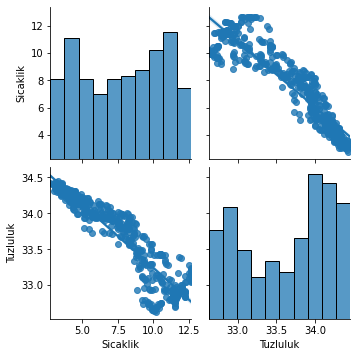

In [4]:
# Verileri inceleyelim
import seaborn as sns
sns.pairplot(datas_df, kind="reg")

In [5]:
datas_df.shape

(500, 2)

In [6]:
# Null veri var mı?
datas_df.isnull().sum()

Sicaklik    1
Tuzluluk    6
dtype: int64

In [7]:
# Null (NaN) verilerin olduğu satırları düşürelim.

datas_df.fillna(method='ffill', inplace=True)
datas_df.isnull().sum()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


Sicaklik    0
Tuzluluk    0
dtype: int64

In [8]:
# Tuzluluk sütununu X, Sicaklik sütununu Y bileşenleri olarak ayıralım.
X = np.array(datas_df['Tuzluluk']).reshape(-1, 1)
y = np.array(datas_df['Sicaklik']).reshape(-1, 1)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [10]:
# Bu veriseti üzerinde Doğrusal Regresyon uygulayalım. 
from sklearn.linear_model import LinearRegression 
dogrusal_reg = LinearRegression() 
  
dogrusal_reg.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
y_pred = dogrusal_reg.predict(X_test)                                     
dogruluk_puani = dogrusal_reg.score(X_test, y_test)                       
print("Dogrusal Regresyon Modeli Dogruluk Puani: " + "{:.1%}".format(dogruluk_puani))

Dogrusal Regresyon Modeli Dogruluk Puani: 83.2%


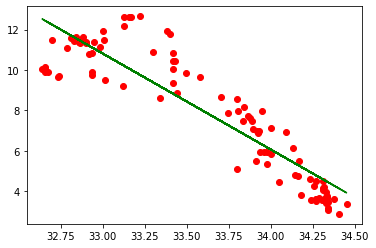

In [12]:
# Doğrusal Regresyon modelini grafiğe dökelim.

plt.scatter(X_test, y_test, color='r')
plt.plot(X_test, y_pred, color='g')
plt.show()

Doğruluk tayini sonucu iyi çıkmasına rağmen, veri setinin trendini bir lineer fonksiyonun temsil etmesini tercih etmeyebiliriz. Grafikte de görüleceği üzere, veri setinin trendi daha çok bir eğriyi çağrıştırmaktadır. 

In [13]:
# Veriseti üzerinde 4. dereceden Polinom Regresyon uygulayalım. 
# PolynomialFeatures fonksiyonunu çağıralım. 
from sklearn.preprocessing import PolynomialFeatures 

# PolynomialFeatures fonksiyonu, regresyonda kullanılacak eğitim veri setini belirtilen derecede 
# bir polinom olarak algılamak için kullanılan bir ön işleme fonksiyonudur.

poli_reg = PolynomialFeatures(degree = 4) # polinom fonksiyonu tanımlanır.
transform_poli = poli_reg.fit_transform(X_train) # X eğitim verileri bu polinoma uydurulur ve dönüştürülür. 
  

dogrusal_reg2 = LinearRegression() # Şimdi, lineer regresyon fonksiyonumuzu çağırıyoruz. 
dogrusal_reg2.fit(transform_poli,y_train) # Bu fonksiyon, polinoma dönüştürülmüş X eğitim verisi ve y eğitim verisi ile uyumlandırılır.

poli_tahmin = dogrusal_reg2.predict(transform_poli) # polinoma dönüştürülmüş X eğitim veri seti üzerine regresyon fonksiyonu ile tahmin gerçekleştirilir.


In [14]:
#polinom_egitim_dogruluk_puani = dogrusal_reg2.score(X_test, y_test)                 
#print("Polinom Regresyon Modeli Dogruluk Puani: " + "{:.1%}".format(polinom_egitim_dogruluk_puani))
from sklearn.metrics import mean_squared_error,r2_score
rmse = np.sqrt(mean_squared_error(y_train,poli_tahmin))
r2 = r2_score(y_train,poli_tahmin)
print("Test verisi için Karesel Ortalama Hata: " +"{:.2}".format(rmse))
print("Test verisi için R2 Skoru: " +"{:.2}".format(r2))


Test verisi için Karesel Ortalama Hata: 0.82
Test verisi için R2 Skoru: 0.92


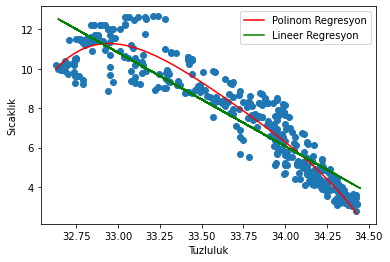

In [15]:
# Eğitim veri seti üzerine tahmini görselleştirelim.
plt.scatter(X_train, y_train)

import operator
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_train,poli_tahmin), key=sort_axis)
X_train, poli_tahmin = zip(*sorted_zip)
plt.plot(X_train, poli_tahmin, color='r', label = 'Polinom Regresyon')
plt.plot(X_test, y_pred, color='g', label = 'Lineer Regresyon')
plt.xlabel('Tuzluluk') 
plt.ylabel('Sıcaklık') 
plt.legend()
plt.show()

In [16]:
# Doğrusal Regresyon sonuçlarına göre 33.82 tuzluluk derecesine karşılık gelen bir örneğin sıcaklığını tahmin etmeye çalışalım. 

dogrusal_reg.predict([[33.82]])

array([[6.92079069]])

In [17]:
# Polinom Regresyon sonuçlarına göre 110 derece sıcaklıktaki bir örneğin basınç değerini tahmin etmeye çalışalım. 
dogrusal_reg2.predict(poli_reg.fit_transform([[33.82]]))

array([[7.42944475]])